<a href="https://colab.research.google.com/github/amannayak/DeepLearningIntro/blob/master/CNN_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation.

In [0]:
from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [0]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(in1 = image , in2 = gaussFilter) 
filterResponseSobelX = signal.convolve2d(in1 = image , in2 = sobelX )
filterResponseSobelY = signal.convolve2d(in1 = image , in2 = sobelY) 

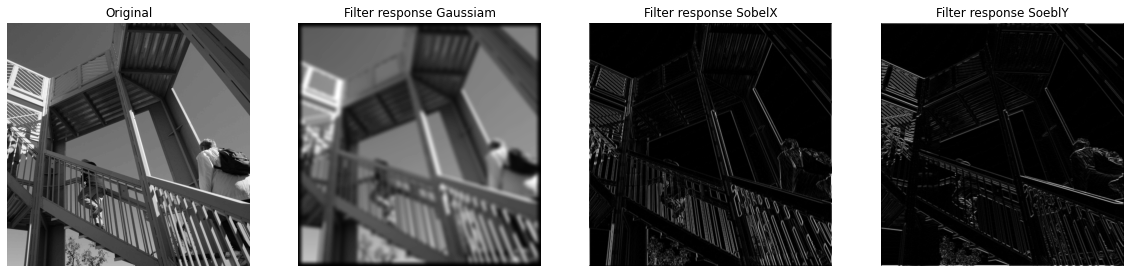

In [21]:
# Show filter responses
import matplotlib.pyplot as plt
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response Gaussiam')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response SobelX')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response SoeblY')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

**Gaussian Filter** 

It is use to introduce smoothning in image or bluring effect in order to detect edges thus it act as low pass filter and can remove high frequency noise from images.  

As gaussian filter is expressed as normal distribution which in tern limit distribution of normalise idependently identically distributed sum of random variables. Since Gaussian filter have highest value at mean(center position) and it decreases rapidly in the area which is three time standard deviation ($3 sigma$) away from mean. Thud pixel in center get maximum value while neighbouring pixel get smaller value and thus smoothing effect can be achieved. Now pixel which is outside 3 std deviation can be igonored. 

**Soebl**
Sobel Filter is used for edge detection. 

Now $SobelX$ processes image in X direction while $SobelY$ process image in Y direction. 

We then we combine images which are represented as sum of the X and Y edges of the image but they can also be processed sepreatly.  



Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Size of Image is : 262144 pixels while shape is 512*512

Image is single channel as it is gray scale in nature.

Color image have 3 channels basically RGB.


Question 3: What is the size of the different filters?

Size of gaussFilter 225

Size of SobelX is 9

Size of SobelY is 9


Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Obatained size is 262144 which is similar to original image.

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 




Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?


Answer 6: Valid mode is used to not do padding on inputs with numbers due to which feature maps will reduce their size and starts to get shrink at each layer thats why it is a problem in CNN with many layers.

In [22]:
# Your code for checking sizes of image and filter responses
#image property 

print("\n")
print(f"Size of image : {image.size}")
print("\n")

print(f"Is gray scale (third value in shape tuple will be missing if it is gray scale): {image.shape}")
print("\n")

print(f"Size of gaussFilter {gaussFilter.size}")
print("\n")
print(f"Shape of gaussFilter {gaussFilter.shape}")
print("\n")

print(f"Size of SobelX {sobelX.size}")
print("\n")
print(f"Shape of SobelX {sobelX.shape}")
print("\n")


print(f"Size of SobelY {sobelY.size}")
print("\n")
print(f"Shape of SobelY {sobelY.shape}")
print("\n")

print("When mode is set Same")

filterResponseGauss = signal.convolve2d(in1 = image , in2 = gaussFilter , mode = 'same') 
filterResponseSobelX = signal.convolve2d(in1 = image , in2 = sobelX  , mode = 'same')
filterResponseSobelY = signal.convolve2d(in1 = image , in2 = sobelY, mode = 'same') 

print("\n")
print(f"Size of Size of filterd response with gaussFilter {filterResponseGauss.size}")
print("\n")
print(f"Size of Size of filterd response with SobelX {filterResponseSobelX.size}")
print("\n")
print(f"Size of Size of filterd response withSobelY {filterResponseSobelY.size}")
print("\n")

print("When mode is set Valid")

filterResponseGauss = signal.convolve2d(in1 = image , in2 = gaussFilter , mode = 'valid') 
filterResponseSobelX = signal.convolve2d(in1 = image , in2 = sobelX  , mode = 'valid')
filterResponseSobelY = signal.convolve2d(in1 = image , in2 = sobelY, mode = 'valid') 

print("\n")
print(f"Size of Size of filterd response with gaussFilter {filterResponseGauss.size}")
print("\n")
print(f"Size of Size of filterd response with SobelX {filterResponseSobelX.size}")
print("\n")
print(f"Size of Size of filterd response withSobelY {filterResponseSobelY.size}")
print("\n")






Size of image : 262144


Is gray scale (third value in shape tuple will be missing if it is gray scale): (512, 512)


Size of gaussFilter 225


Shape of gaussFilter (15, 15)


Size of SobelX 9


Shape of SobelX (3, 3)


Size of SobelY 9


Shape of SobelY (3, 3)


When mode is set Same


Size of Size of filterd response with gaussFilter 262144


Size of Size of filterd response with SobelX 262144


Size of Size of filterd response withSobelY 262144


When mode is set Valid


Size of Size of filterd response with gaussFilter 248004


Size of Size of filterd response with SobelX 260100


Size of Size of filterd response withSobelY 260100




##  Part 3: Get a graphics card

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [0]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

##  Part 4: How fast is the graphics card?

Lets investigate how much faster a convolution is with the graphics card

Question 7: Why are the filters of size 7 x 7 x 3, and not 7 x 7 ? 

Answer 7: 3 here resemble RGB image. The filter have 3 channels which corresponds to 3 channels of input color image.

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Answer 8: Conv2D is used to create a convolutional layer. yes it is a standard convolution. 

Question 9: How much faster is the graphics card, compared to the CPU, for convolving a batch of 100 images?
Answered Below

Question 10: How much faster is the graphics card, compared to the CPU, for convolving a batch of 2 images? Explain the difference compared to 100 images.

Answered Below

In [24]:
# Run this cell to compare processing time of CPU and GPU

import timeit

n_images_in_batch = 100

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

# Perform convolutions using the CPU
def cpu():
  with tf.device('/cpu:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_cpu)

# Perform convolutions using the GPU (graphics card)
def gpu():
  with tf.device('/device:GPU:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the convolution several times and measure the time
print('Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3'
      ' (batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))



#For batch of 2

print("For batch of 2 Images")
n_images_in_batch = 2

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the convolution several times and measure the time
print('Time (s) to convolve 32 filters of size 7 x 7 x 3 over 2 random images of size 100 x 100 x 3'
      ' (batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3 (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.236684557999979
GPU (s):
0.11101304699991488
GPU speedup over CPU: 29x
For batch of 2 Images
Time (s) to convolve 32 filters of size 7 x 7 x 3 over 2 random images of size 100 x 100 x 3 (batch x height x width x channel). Sum of ten runs.
CPU (s):
0.1266955149999376
GPU (s):
0.047386379999807104
GPU speedup over CPU: 2x


##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [25]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()
XtrainResnet50 = Xtest[0:5]
print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

170500096/170498071 [==============================] - 6s 0us/step
Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

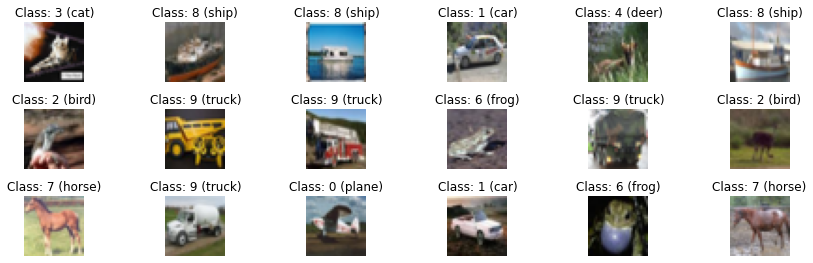

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [27]:
from sklearn.model_selection import train_test_split

Xtrain , Xval , Ytrain , Yval = train_test_split(Xtrain , Ytrain , test_size = 0.25, shuffle = True , random_state = 42)


# Print the size of training data, validation data and test data

print("\n")
print(f"Size of Training data as Xtrain is {Xtrain.shape}")
print("\n")

print("\n")
print(f"Size of training label Ytrain is {Ytrain.shape}")
print("\n")


print("\n")
print(f"Size of validation data as Xval is {Xval.shape}")
print("\n")


print("\n")
print(f"Size of validation Label as Yval is {Yval.shape}")
print("\n")

print("\n")
print(f"Size of Test data as Xtest is {Xtest.shape}")
print("\n")

print("\n")
print(f"Size of Test label as Ytest is {Ytest.shape}")
print("\n")





Size of Training data as Xtrain is (7500, 32, 32, 3)




Size of training label Ytrain is (7500, 1)




Size of validation data as Xval is (2500, 32, 32, 3)




Size of validation Label as Yval is (2500, 1)




Size of Test data as Xtest is (2000, 32, 32, 3)




Size of Test label as Ytest is (2000, 1)




##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [0]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/utils/#to_categorical

In [29]:
from keras.utils import to_categorical

# Print shapes before converting the labels
print(f"Before converting label, shape of Ytrain is {Ytrain.shape} , shape of Yval is {Yval.shape} and shape of Ytest is {Ytest.shape}")

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain , dtype = 'float32')
Yval =   to_categorical(Yval , dtype = 'float32')
Ytest =  to_categorical(Ytest , dtype = 'float32')


# Print shapes after converting the labels
print(f"After converting label, shape of Ytrain is {Ytrain.shape} , shape of Yval is {Yval.shape} and shape of Ytest is {Ytest.shape}")


Before converting label, shape of Ytrain is (7500, 1) , shape of Yval is (2500, 1) and shape of Ytest is (2000, 1)
After converting label, shape of Ytrain is (7500, 10) , shape of Yval is (2500, 10) and shape of Ytest is (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [0]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam , SGD
from keras.losses import categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01 , dRate = 0.5 , actfn = 'relu' , numClass = 10, optim = "Adam") :
     #Set seed 
    SEED = 123
    seed(SEED)
    tf.random.set_seed(SEED)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['PYTHONHASHSEED']=str(SEED)
    #random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED) 
    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    # keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), 
    #                     activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, 
    #                     bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

    #since this is first layer, additional input parameter as input_shape is needed

    model.add(Conv2D(input_shape = input_shape , filters = n_filters , kernel_size = (3,3) , padding = 'same' , activation = actfn ))
   #Add pooling layer: downsampling  
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
      n_filters = 2*n_filters  
      model.add(Conv2D(filters = n_filters , kernel_size = (3,3) , padding = 'same' , activation = actfn ))
      model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    # Add flatten layer
    model.add(Flatten())  
            
    # Add intermediate dense layers
    for i in range(n_dense_layers):
      model.add(Dense(units = n_nodes , activation = actfn))     
      if use_dropout == True:
        model.add(Dropout(rate = dRate))
      BatchNormalization(axis = 1)  
    # Add final dense layer
    model.add(Dense(units = numClass , activation = 'softmax'))

    # Compile model  
    if optim == "Adam":
      optimfn = Adam(learning_rate)
    
    if optim == "SGD":
      optimfn = SGD(learning_rate)

    model.compile(loss = categorical_crossentropy , optimizer = optimfn, metrics=['accuracy'] )
    
    return model

In [0]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

## 2 convolutional layers, no intermediate dense layers

In [32]:
# Setup some training parameters
batch_size = 100
epochs = 20
#input_shape = Xtrain.shape

nRow = Xtrain[0].shape[0]
nCol = Xval[0].shape[1]
input_shape = (nRow , nCol , 3)

# Build model
model1 = build_CNN(input_shape = input_shape , n_conv_layers = 2 , n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01 , dRate = 0 , actfn = 'relu' , numClass = 10, optim = "Adam")

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain , batch_size = batch_size , epochs = epochs , verbose = 1 , validation_data = (Xval,Yval))


Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 1s 112us/step - loss: 1.9613 - accuracy: 0.2876 - val_loss: 1.6776 - val_accuracy: 0.3756
Epoch 2/20
7500/7500 [==============================] - 1s 72us/step - loss: 1.5709 - accuracy: 0.4292 - val_loss: 1.5009 - val_accuracy: 0.4600
Epoch 3/20
7500/7500 [==============================] - 1s 72us/step - loss: 1.4268 - accuracy: 0.4893 - val_loss: 1.4599 - val_accuracy: 0.4688
Epoch 4/20
7500/7500 [==============================] - 1s 76us/step - loss: 1.3880 - accuracy: 0.4984 - val_loss: 1.4671 - val_accuracy: 0.4752
Epoch 5/20
7500/7500 [==============================] - 1s 75us/step - loss: 1.3731 - accuracy: 0.5027 - val_loss: 1.4567 - val_accuracy: 0.4876
Epoch 6/20
7500/7500 [==============================] - 1s 73us/step - loss: 1.3225 - accuracy: 0.5287 - val_loss: 1.4285 - val_accuracy: 0.4960
Epoch 7/20
7500/7500 [==============================] - 1s 74us/step - loss: 1.29

In [33]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest , Ytest , verbose = 1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 116us/step
Test loss: 1.4463
Test accuracy: 0.5025


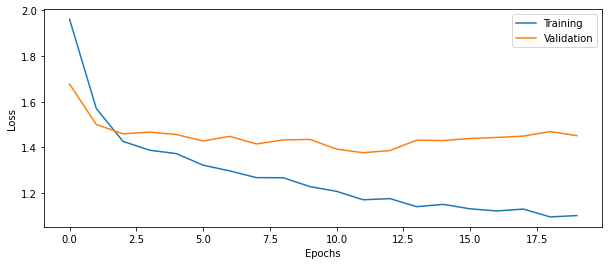

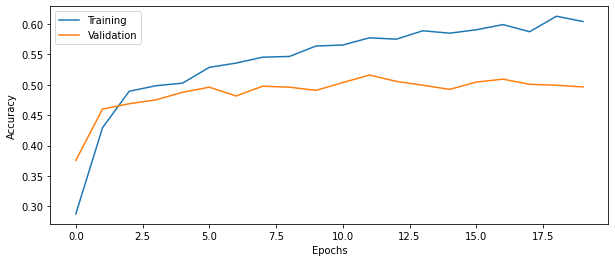

In [34]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance
Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Model is working with 52.25% accurracy which can not be considered as satisfactory. 

Question 11: How big is the difference between training and test accuracy?

Ans: From above epoch values, it can be seen that model is having 20% less accuracy for test data when compared with training model. 

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'watch nvidia-smi' on the cloud computer during training. 

##insert answer here 


Question 13: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

Ans: In DNN lab our inputs were the discrete values thats why it is not a problematic for the model but here we are using images first and the second thing is in this lab we are creating conv2D layers which also requires time to perform feature mapping which will slow down training too much thats why we cant use it in this lab. 



## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [35]:
# Setup some training parameters
batch_size = 100
epochs = 20
nRow = Xtrain[0].shape[0]
nCol = Xval[0].shape[1]
input_shape = (nRow , nCol , 3)

# Build model
model2 = build_CNN(input_shape = input_shape , n_conv_layers = 2 , n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01 , dRate = 0 , actfn = 'relu' , numClass = 10, optim = "Adam")

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain, Ytrain , batch_size = batch_size , epochs = epochs , verbose = 1 , validation_data = (Xval,Yval))


Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 1s 98us/step - loss: 1.9582 - accuracy: 0.2787 - val_loss: 1.7560 - val_accuracy: 0.3840
Epoch 2/20
7500/7500 [==============================] - 1s 77us/step - loss: 1.5835 - accuracy: 0.4151 - val_loss: 1.5005 - val_accuracy: 0.4356
Epoch 3/20
7500/7500 [==============================] - 1s 75us/step - loss: 1.3997 - accuracy: 0.4853 - val_loss: 1.4422 - val_accuracy: 0.4576
Epoch 4/20
7500/7500 [==============================] - 1s 77us/step - loss: 1.3198 - accuracy: 0.5236 - val_loss: 1.4456 - val_accuracy: 0.4876
Epoch 5/20
7500/7500 [==============================] - 1s 76us/step - loss: 1.2593 - accuracy: 0.5475 - val_loss: 1.4051 - val_accuracy: 0.5060
Epoch 6/20
7500/7500 [==============================] - 1s 76us/step - loss: 1.1738 - accuracy: 0.5696 - val_loss: 1.3856 - val_accuracy: 0.5128
Epoch 7/20
7500/7500 [==============================] - 1s 75us/step - loss: 1.137

In [36]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest , Ytest , verbose = 1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 78us/step
Test loss: 1.8144
Test accuracy: 0.4880


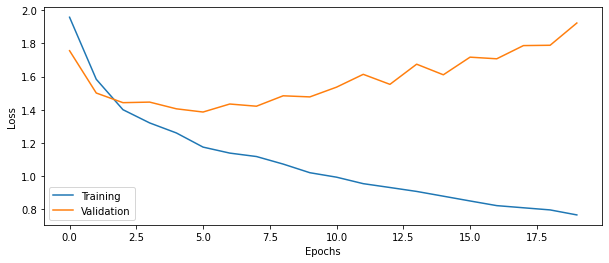

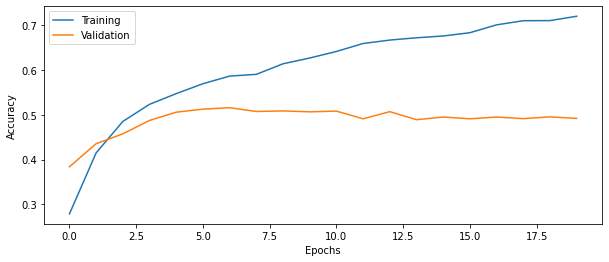

In [37]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [38]:
# Setup some training parameters
batch_size = 100
epochs = 20

nRow = Xtrain[0].shape[0]
nCol = Xval[0].shape[1]
input_shape = (nRow , nCol , 3)

# Build model
model3 = build_CNN(input_shape = input_shape , n_conv_layers = 4 , n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01 , dRate = 0 , actfn = 'relu' , numClass = 10, optim = "Adam")

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain, Ytrain , batch_size = batch_size , epochs = epochs , verbose = 1 , validation_data = (Xval,Yval))


Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 1s 132us/step - loss: 2.0539 - accuracy: 0.2269 - val_loss: 1.8573 - val_accuracy: 0.3072
Epoch 2/20
7500/7500 [==============================] - 1s 84us/step - loss: 1.7752 - accuracy: 0.3333 - val_loss: 1.6676 - val_accuracy: 0.3856
Epoch 3/20
7500/7500 [==============================] - 1s 81us/step - loss: 1.6176 - accuracy: 0.4001 - val_loss: 1.5698 - val_accuracy: 0.4108
Epoch 4/20
7500/7500 [==============================] - 1s 85us/step - loss: 1.5409 - accuracy: 0.4299 - val_loss: 1.5307 - val_accuracy: 0.4364
Epoch 5/20
7500/7500 [==============================] - 1s 84us/step - loss: 1.4489 - accuracy: 0.4643 - val_loss: 1.4825 - val_accuracy: 0.4600
Epoch 6/20
7500/7500 [==============================] - 1s 82us/step - loss: 1.3900 - accuracy: 0.4928 - val_loss: 1.4751 - val_accuracy: 0.4660
Epoch 7/20
7500/7500 [==============================] - 1s 83us/step - loss: 1.36

In [39]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest , Ytest , verbose = 1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 115us/step
Test loss: 2.0211
Test accuracy: 0.4510


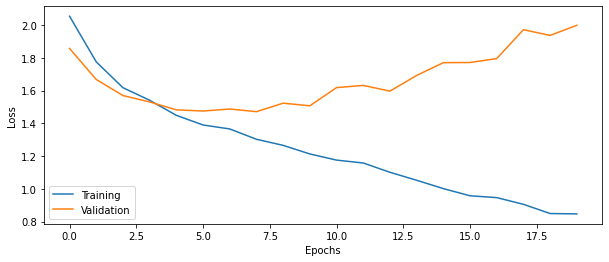

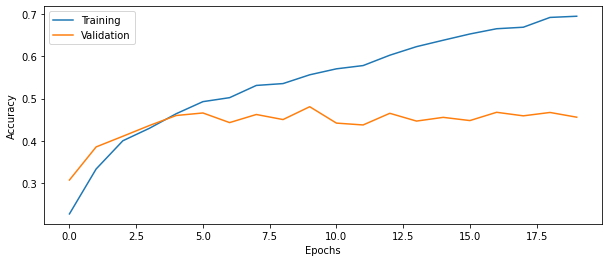

In [40]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 14: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Ans: Model have 123,600 , 4th layer of Con2D, have maximum parameters  

Question 15: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Ans: Input is input shape of the data and output is tensor of rank4. and output dimensions are 32x32x16.

Question 16: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Ans: Yes it is always the first dimension of 4D tensor.

Question 17: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?



Question 18: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Question 19: How does MaxPooling help in reducing the number of parameters to train?

Ans: It just slides a window over its input and takes the maximum value of that window and through this it will reduce the number of trainable weights.

In [41]:
# Print network architecture

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)        

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 20: How much did the test accuracy improve with dropout, compared to without dropout?

Ans: It did not improved.

Question 21: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?

Ans: L1 and L2 regularization can be added by using l2 method of regularizers class. 


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [42]:
# Setup some training parameters
batch_size = 100
epochs = 20
nRow = Xtrain[0].shape[0]
nCol = Xval[0].shape[1]
input_shape = (nRow , nCol , 3)

# Build model
model4 = build_CNN(input_shape = input_shape , n_conv_layers = 4 , n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01 , dRate = 0.5 , actfn = 'relu' , numClass = 10, optim = "Adam")

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain, Ytrain , batch_size = batch_size , epochs = epochs , verbose = 1 , validation_data = (Xval,Yval))


Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 1s 129us/step - loss: 2.3079 - accuracy: 0.1055 - val_loss: 2.3028 - val_accuracy: 0.1012
Epoch 2/20
7500/7500 [==============================] - 1s 88us/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3029 - val_accuracy: 0.0940
Epoch 3/20
7500/7500 [==============================] - 1s 88us/step - loss: 2.3033 - accuracy: 0.1025 - val_loss: 2.3036 - val_accuracy: 0.0940
Epoch 4/20
7500/7500 [==============================] - 1s 87us/step - loss: 2.3029 - accuracy: 0.1044 - val_loss: 2.3035 - val_accuracy: 0.0940
Epoch 5/20
7500/7500 [==============================] - 1s 86us/step - loss: 2.3030 - accuracy: 0.1052 - val_loss: 2.3033 - val_accuracy: 0.1008
Epoch 6/20
7500/7500 [==============================] - 1s 86us/step - loss: 2.3028 - accuracy: 0.1037 - val_loss: 2.3032 - val_accuracy: 0.0940
Epoch 7/20
7500/7500 [==============================] - 1s 89us/step - loss: 2.30

In [43]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest , Ytest , verbose = 1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 92us/step
Test loss: 2.3029
Test accuracy: 0.0975


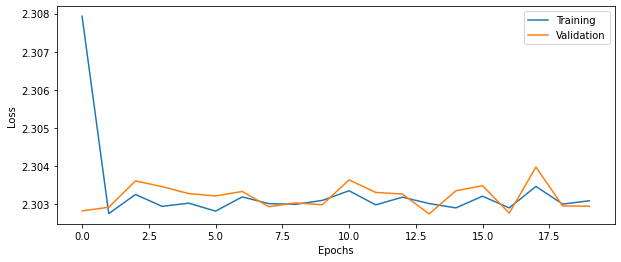

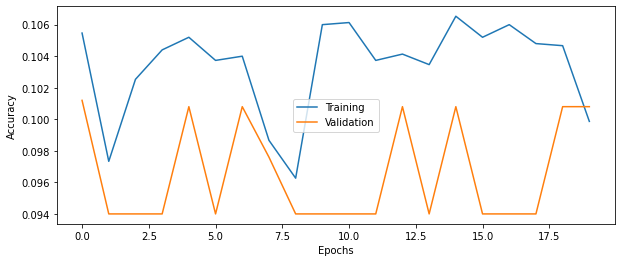

In [44]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 22: How high test accuracy can you obtain? What is your best configuration?

## Your best config

In [45]:
# Setup some training parameters
batch_size = 100
epochs = 8
nRow = Xtrain[0].shape[0]
nCol = Xval[0].shape[1]
input_shape = (nRow , nCol , 3)

# Build model
model5 = build_CNN(input_shape = input_shape , n_conv_layers = 3 , n_filters=16, n_dense_layers=4, n_nodes=50, use_dropout=False, learning_rate=0.01 , dRate = 0.5 , actfn = 'relu' , numClass = 10, optim = "Adam")

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain, Ytrain , batch_size = batch_size , epochs = epochs , verbose = 1 , validation_data = (Xval,Yval))


Train on 7500 samples, validate on 2500 samples
Epoch 1/8
7500/7500 [==============================] - 1s 127us/step - loss: 2.0636 - accuracy: 0.2161 - val_loss: 1.9463 - val_accuracy: 0.2388
Epoch 2/8
7500/7500 [==============================] - 1s 91us/step - loss: 1.8710 - accuracy: 0.2752 - val_loss: 1.8217 - val_accuracy: 0.3040
Epoch 3/8
7500/7500 [==============================] - 1s 88us/step - loss: 1.7698 - accuracy: 0.3116 - val_loss: 1.7269 - val_accuracy: 0.3124
Epoch 4/8
7500/7500 [==============================] - 1s 89us/step - loss: 1.6947 - accuracy: 0.3501 - val_loss: 1.6499 - val_accuracy: 0.3648
Epoch 5/8
7500/7500 [==============================] - 1s 89us/step - loss: 1.6284 - accuracy: 0.3744 - val_loss: 1.6424 - val_accuracy: 0.4008
Epoch 6/8
7500/7500 [==============================] - 1s 87us/step - loss: 1.6090 - accuracy: 0.4019 - val_loss: 1.5687 - val_accuracy: 0.4176
Epoch 7/8
7500/7500 [==============================] - 1s 87us/step - loss: 1.5085 - ac

In [46]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest , Ytest , verbose = 1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 87us/step
Test loss: 1.4991
Test accuracy: 0.4425


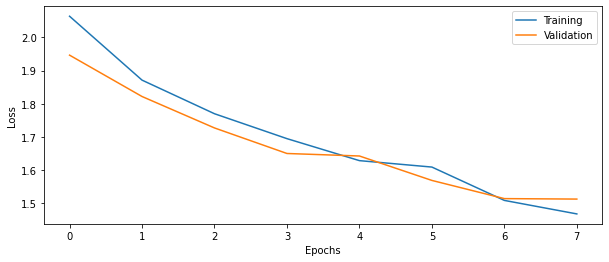

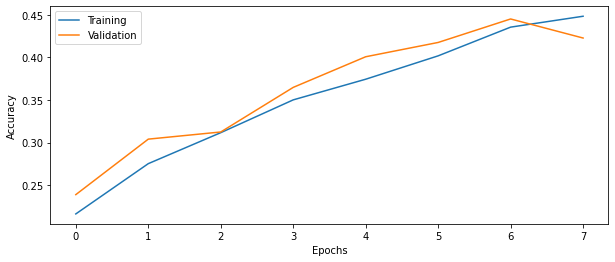

In [47]:
# Plot the history from the training run
plot_results(history5)

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 1s 116us/step - loss: 2.0620 - accuracy: 0.2068 - val_loss: 1.8845 - val_accuracy: 0.2820
Epoch 2/20
7500/7500 [==============================] - 1s 84us/step - loss: 1.8118 - accuracy: 0.3017 - val_loss: 1.8005 - val_accuracy: 0.3112
Epoch 3/20
7500/7500 [==============================] - 1s 81us/step - loss: 1.6712 - accuracy: 0.3584 - val_loss: 1.5763 - val_accuracy: 0.4076
Epoch 4/20
7500/7500 [==============================] - 1s 84us/step - loss: 1.5657 - accuracy: 0.4101 - val_loss: 1.5761 - val_accuracy: 0.3988
Epoch 5/20
7500/7500 [==============================] - 1s 83us/step - loss: 1.4825 - accuracy: 0.4489 - val_loss: 1.5206 - val_accuracy: 0.4444
Epoch 6/20
7500/7500 [==============================] - 1s 83us/step - loss: 1.4350 - accuracy: 0.4643 - val_loss: 1.5128 - val_accuracy: 0.4428
Epoch 7/20
7500/7500 [==============================] - 1s 81us/step - loss: 1.37

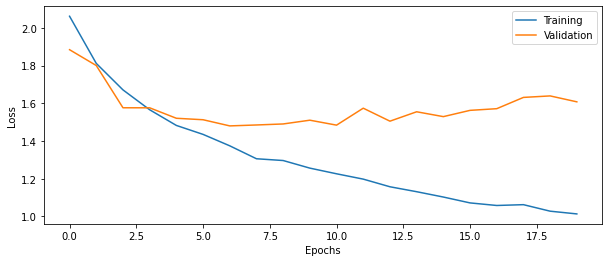

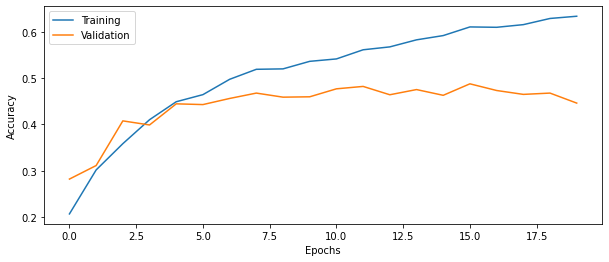

In [48]:
# Setup some training parameters
batch_size = 100
epochs = 20
#input_shape = Xtrain.shape

nRow = Xtrain[0].shape[0]
nCol = Xval[0].shape[1]
input_shape = (nRow , nCol , 3)

# Build model
model5_0 = build_CNN(input_shape = input_shape , n_conv_layers = 2 , n_filters=16, n_dense_layers=4, n_nodes=50, use_dropout=True  , learning_rate=0.01 , dRate = 0 , actfn = 'relu' , numClass = 10, optim = "Adam")

# Train the model  using training data and validation data
history5_0 = model5_0.fit(Xtrain, Ytrain , batch_size = batch_size , epochs = epochs , verbose = 1 , validation_data = (Xval,Yval))

score = model5_0.evaluate(Xtest , Ytest , verbose = 1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])


plot_results(history5_0)


##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 23: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

Test accuracy is reduced for the rotated images due to the shrinkage of image which may be leads towards the object cutting from image.

In [0]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

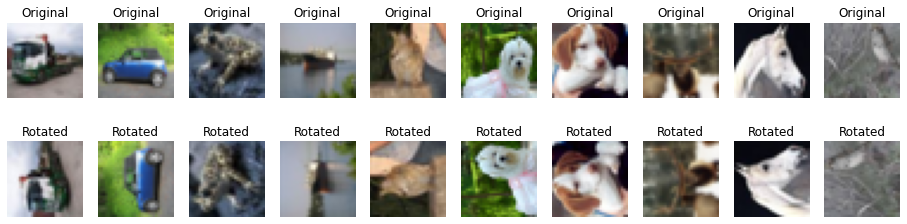

In [50]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [51]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated , Ytest , verbose = 1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 0s 124us/step
Test loss: 2.9449
Test accuracy: 0.1835


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://keras.io/preprocessing/image/

In [0]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [0]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
Xtrain , Xval , Ytrain , Yval = train_test_split(Xtrain , Ytrain , test_size = 0.20, shuffle = True , random_state = 42)

# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 30 , horizontal_flip = True , vertical_flip = True)


#Setup a flow for training data, assume that we can fit all images into CPU memory
#datagen.fit(Xtrain)

#model5_0.fit_generator(datagen.flow(Xtrain , Ytrain,batch_size=batch_size ,steps_per_epoch = len(Xtrain)/batch_size , epochs = epochs))


# Setup a flow for validation data, assume that we can fit all images into CPU memory
#datagen.fit(Xval)


## Part 18: What about big data?

Question 24: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?



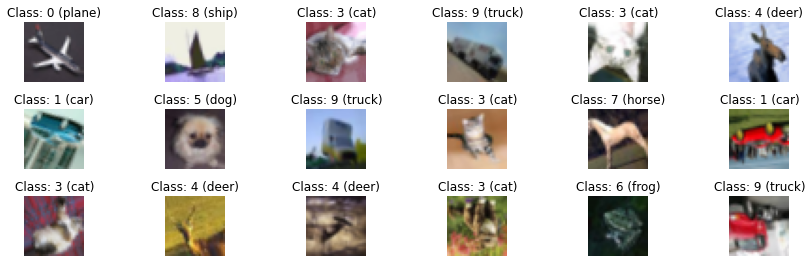

In [54]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/models/model/ for how to use model.fit_generator instead of model.fit for training

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 25: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

Question 26: What other types of image augmentation can be applied, compared to what we use here?

In [55]:
# Setup some training parameters
batch_size = 100
epochs = 200
nRow = Xtrain[0].shape[0]
nCol = Xval[0].shape[1]
input_shape = (nRow , nCol , 3)

# Build model (your best config)
model6 = build_CNN(input_shape = input_shape , n_conv_layers = 2 , n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01 , dRate = 0 , actfn = 'relu' , numClass = 10, optim = "Adam")

validation_split=0.2
stepPerEpoch = len(Xval)*(1 - validation_split)/batch_size
validationSteps = len(Xtrain)*validation_split/batch_size


# Train the model using on the fly augmentation
history6 = model6.fit_generator(datagen.flow(Xtrain, Ytrain , batch_size = batch_size), epochs = epochs , verbose = 1 , validation_data = (Xval , Yval) ,
                                steps_per_epoch =  stepPerEpoch , validation_steps = validationSteps )

Epoch 1/200
16/16 [==============================] - 1s 54ms/step - loss: 2.2201 - accuracy: 0.1794 - val_loss: 2.1050 - val_accuracy: 0.2160
Epoch 2/200
16/16 [==============================] - 1s 41ms/step - loss: 2.0845 - accuracy: 0.2250 - val_loss: 2.0228 - val_accuracy: 0.2490
Epoch 3/200
16/16 [==============================] - 1s 41ms/step - loss: 2.0264 - accuracy: 0.2488 - val_loss: 1.9354 - val_accuracy: 0.2765
Epoch 4/200
16/16 [==============================] - 1s 42ms/step - loss: 1.9694 - accuracy: 0.2681 - val_loss: 1.8348 - val_accuracy: 0.3050
Epoch 5/200
16/16 [==============================] - 1s 40ms/step - loss: 1.9109 - accuracy: 0.2981 - val_loss: 1.8918 - val_accuracy: 0.2965
Epoch 6/200
16/16 [==============================] - 1s 47ms/step - loss: 1.8478 - accuracy: 0.3306 - val_loss: 1.7765 - val_accuracy: 0.3300
Epoch 7/200
16/16 [==============================] - 1s 42ms/step - loss: 1.8502 - accuracy: 0.3056 - val_loss: 1.7955 - val_accuracy: 0.3355
Epoch 

In [56]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.4520
Test accuracy: 0.4805
Test loss: 2.5553
Test accuracy: 0.2515


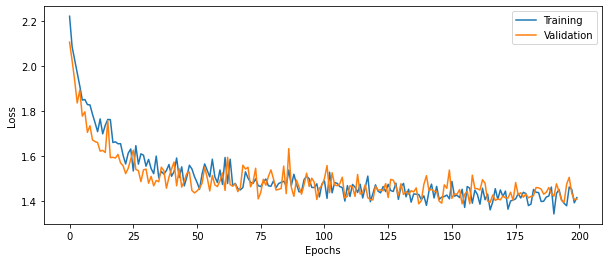

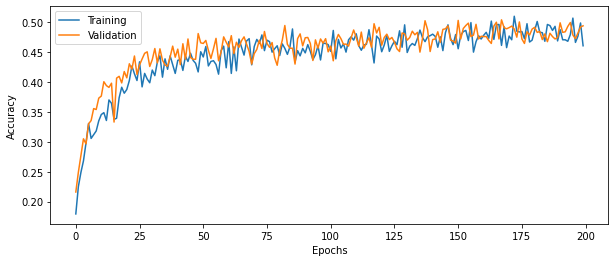

In [57]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly

In [0]:
# Find misclassified images
y_pred = model6.predict_classes(Xtest)
y_correct = np.argmax(Ytest,axis=1)

miss = np.flatnonzero(y_correct != y_pred)

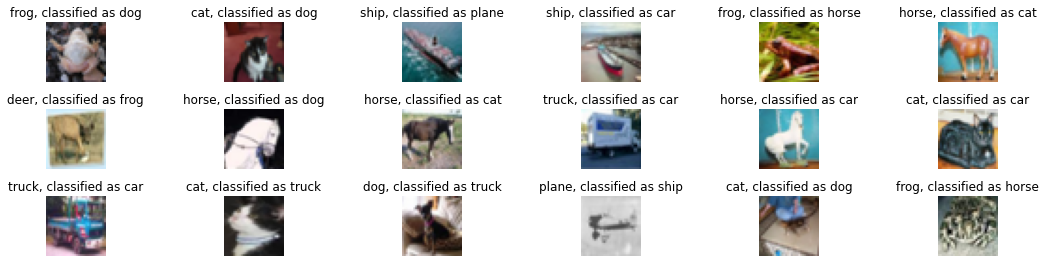

In [59]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 27: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Ans: No because we have defined the filter size according to the image size.

Question 28: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

Ans: Yes it is possible by resizing the images to the predefined level.

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database. Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 29: How many convolutional layers does ResNet50 have? 

Ans: 50.

Question 30: How many trainable parameters does the ResNet50 network have? 

23 million trainable parameters

Question 31: What is the size of the images that ResNet50 expects as input?

224x244

Question 32: Using the answer to question 30, explain why the second derivative is seldom used when training deep networks.

to measure the slope of the gradient descent.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/applications/#resnet

Useful functions

`image.load_img` in keras.preprocessing

`image.img_to_array` in keras.preprocessing

`ResNet50` in keras.applications.resnet50

`preprocess_input` in keras.applications.resnet50

`decode_predictions` in keras.applications.resnet50

`expand_dims` in numpy


In [60]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice
from keras.applications import resnet50
from keras.preprocessing import image
import os
import numpy as np
model_Resnet50 = resnet50.ResNet50(weights='imagenet')
arrImg = '/content/sample_data/Images'
data_paths = [i for i in (os.path.join(arrImg, f) for f in os.listdir(arrImg)) if os.path.isfile(i)]
for  path in data_paths:
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = resnet50.preprocess_input(x)
  predictions = model_Resnet50.predict(x)
  predicted_classes = resnet50.decode_predictions(predictions, top=9)
  print("\n")
  print("This is an image of:")

  for imagenet_id, name, likelihood in predicted_classes[0]:
      print(" - {}: {:2f} likelihood".format(name, likelihood))






This is an image of:
 - tabby: 0.653074 likelihood
 - Egyptian_cat: 0.147092 likelihood
 - tiger_cat: 0.114819 likelihood
 - lynx: 0.038038 likelihood
 - remote_control: 0.003717 likelihood
 - window_screen: 0.002466 likelihood
 - plastic_bag: 0.001286 likelihood
 - computer_keyboard: 0.001161 likelihood
 - lens_cap: 0.001152 likelihood


This is an image of:
 - Persian_cat: 0.359798 likelihood
 - Pomeranian: 0.298260 likelihood
 - schipperke: 0.136587 likelihood
 - groenendael: 0.069075 likelihood
 - chow: 0.012254 likelihood
 - tiger_cat: 0.009015 likelihood
 - tabby: 0.006824 likelihood
 - Border_collie: 0.006624 likelihood
 - keeshond: 0.006560 likelihood


This is an image of:
 - tiger_cat: 0.315014 likelihood
 - Egyptian_cat: 0.179484 likelihood
 - tabby: 0.150707 likelihood
 - window_screen: 0.091203 likelihood
 - refrigerator: 0.030440 likelihood
 - dishwasher: 0.023308 likelihood
 - sliding_door: 0.014032 likelihood
 - laptop: 0.009083 likelihood
 - file: 0.008995 likelihood